<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/Assignment_2/D3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2 solution for D3.csv by VIPIN_2011MT22**

In [186]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit

In [187]:
#importing the dataset

D3 = pd.read_csv('D3.csv')
data = D3['Passengers']
D3.head(250)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


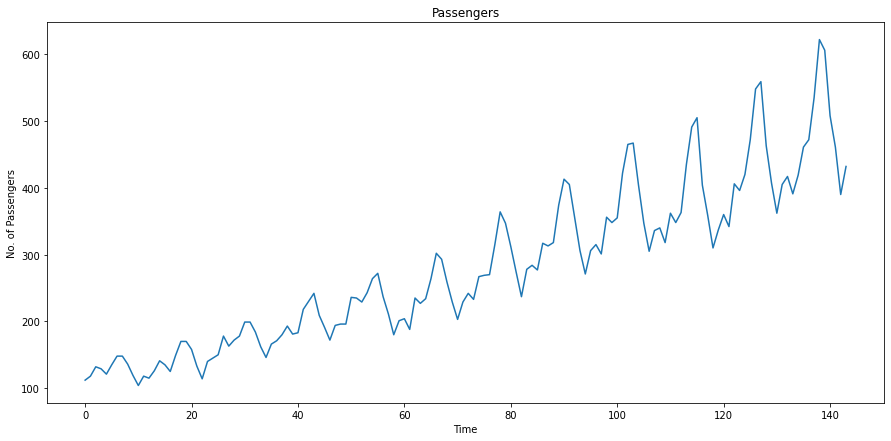

In [188]:
#plotting the time series

plt.figure(figsize=(15, 7))
plt.plot(D3['Passengers'])
plt.xlabel("Time")
plt.ylabel("No. of Passengers")
plt.title('Passengers')
plt.show()

In [189]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

#Single Exponential Smoothing

In [190]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [191]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [192]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=1), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=1), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=1), "\n")

MSE for alpha =.4 is   1910.1355387394074 

MSE for alpha =.35 is  2001.3307164094072 

MSE for alpha =.65 is  1491.1832125116389 

MSE for alpha =.85 is  1252.8350816023635 



from different combinations of alpha, for alpha = .85, MSE is minimum

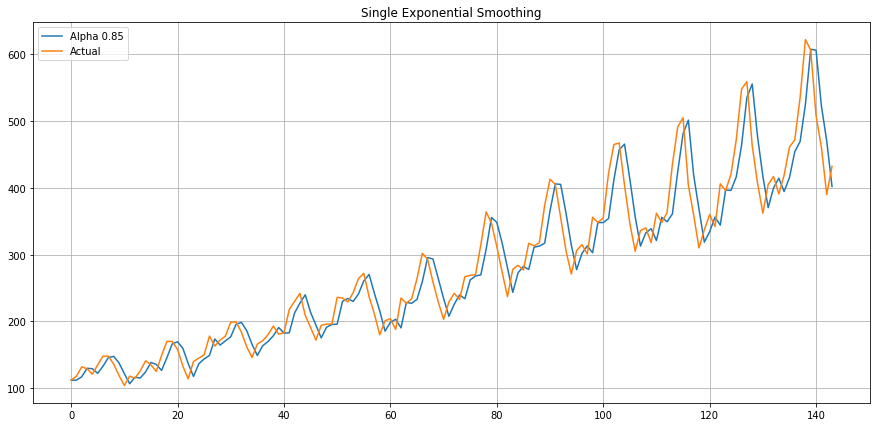

In [193]:
#plotting single exponential smoothing with actual and forecast value

def plot_singleexponentialsmoothing(data, alphas,n):
    plt.figure(figsize=(15, 7))
    for alpha in alphas:
        plt.plot(single_exponential_smoothing(data, alpha,n), label='Alpha {}'.format(alpha))

    plt.plot(data_n(data,n), label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Single Exponential Smoothing')
    plt.grid(True)

data = D3['Passengers']
plot_singleexponentialsmoothing(data.values, [.85],1)

#Double Exponential Smoothing

In [194]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [195]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [196]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=1), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=1), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2  is  2513.7811860186494 

MSE for alpha =.35, beta = .5  is  3814.113661842664 

MSE for alpha =.85, beta = .6  is  1572.578312914413 

MSE for alpha =.45, beta = .6  is  2885.1078743501766 

MSE for alpha =.7,  beta = .55 is  1851.747148874802 

MSE for alpha =.2,  beta = .6  is  4705.405923426468 



from different combinations of alpha & beta, for alpha = .85 & beta = .6, MSE is minimum

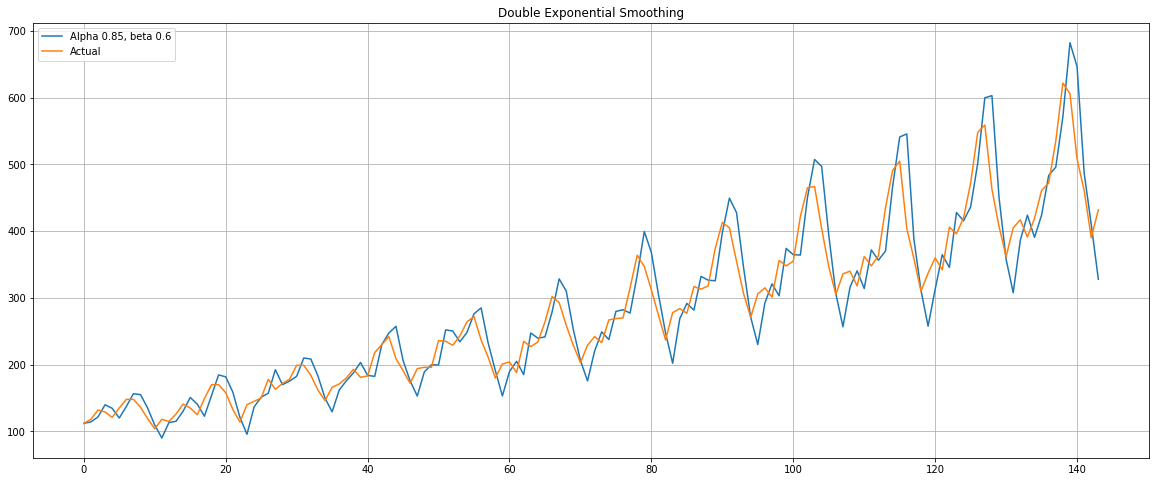

In [197]:
#plotting double exponential smoothing with actual and forecast value

def plot_doubleexponentialsmoothing(data, alphas, betas, interval):
  plt.figure(figsize=(20, 8))
  for alpha, beta in zip(alphas, betas):
    results = double_exponential_smoothing(data, alpha, beta, interval)
    plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))
  plt.plot(data_n(data,interval), label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Double Exponential Smoothing')
  plt.grid(True)

plot_doubleexponentialsmoothing(data.values, [.85], [0.6], 1)


#Triple Exponential Smoothing

In [259]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [260]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [261]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,12, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,12, .35, .5, .3, interval=1), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,12, .45, .6, .4 ,interval=1), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,12, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,12, .3, .5, .55, interval=1), "\n")
print("MSE for alpha =.45, beta = .65, gamma = .45 is " ,MSE_TES(data,12, .45, .65, .45 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .25, gamma = .50 is " ,MSE_TES(data,12, .7, .25 , .50,interval=1), "\n")
print("MSE for alpha =.35, beta = .2,  gamma = .1  is " ,MSE_TES(data,12, .35, .2, .1, interval=1), "\n")
print("MSE for alpha =.9,  beta = .2,  gamma = .1  is " ,MSE_TES(data, 12, .9, .2,.1 ,interval=1), "\n")
print("MSE for alpha =.85, beta = .3,  gamma = .1  is " ,MSE_TES(data,12, .85, .3, .1 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  79.08234255664138 

MSE for alpha =.35, beta = .5,  gamma = .3  is  613.8864018789243 

MSE for alpha =.45, beta = .6,  gamma = .4  is  733.0942242245014 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  79.08234255664138 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  356.85519206623917 

MSE for alpha =.45, beta = .65, gamma = .45 is  997.4311154469261 

MSE for alpha =.7,  beta = .25, gamma = .50 is  57.03503003299592 

MSE for alpha =.35, beta = .2,  gamma = .1  is  260.8337842842032 

MSE for alpha =.9,  beta = .2,  gamma = .1  is  26.10504012903006 

MSE for alpha =.85, beta = .3,  gamma = .1  is  47.86890506837314 



from different combinations of alpha, beta, gamma ,
 for alpha = .9 , beta = .2   , gamma= .1   , MSE is minimum

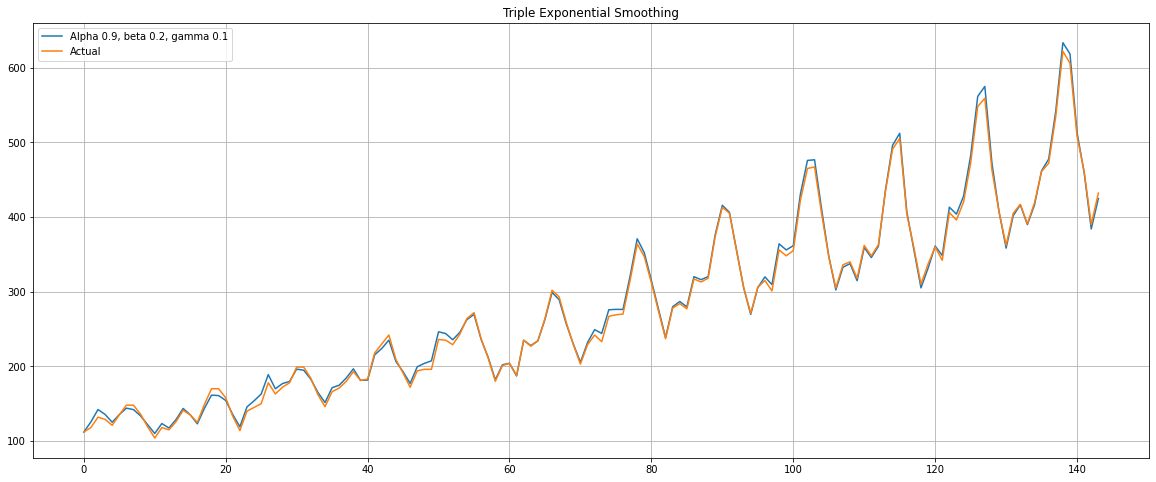

In [262]:
#plotting the triple exponential function with actual and predicted value

def plot_triple_exponential_smoothing(data, slen, alphas, betas,gammas, interval):
  plt.figure(figsize=(20, 8))
  for alpha, beta , gamma in zip(alphas, betas, gammas):
    results = triple_exponential_smoothing(data, 24, alpha, beta, gamma,interval)
    plt.plot(results, label='Alpha {}, beta {}, gamma {}'.format(alpha, beta, gamma))
  plt.plot(data_n(data,interval), label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Triple Exponential Smoothing')
  plt.grid(True)

plot_triple_exponential_smoothing(data.values, 12,[0.9], [0.2], [.1], 1)

#KPSS Test

In [202]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D3[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Passengers')

Results of KPSS Test for  Passengers
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D3 , the value of the test statistic is less than the critical value at all confidence intervals in the KPSS test, hence we can reject the null hypothesis i.e. the series is non stationary.

#ADF Test

In [203]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D3[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('Passengers')

Results of Dickey-Fuller Test for  Passengers 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


>For the given dataset D3 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test,i.e. the series is non stationary.

Note:  The signed values should be compared and not the absolute values.

**From the both test we can conclude that its non stationary**

#single exponential smoothing with different intervals

In [204]:
#prediction of alpha beta gamma for minimum MSE for i month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 1 months is " , MSE_SES(data, .85, interval=1), "\n")
print("MSE for alpha =..8 with interval = 1 months is " , MSE_SES(data, .8, interval=1), "\n")
print("MSE for alpha =..7 with interval = 1 months is " , MSE_SES(data, .7, interval=1), "\n")

MSE for alpha =.85 with interval = 1 hours is  1252.8350816023635 

MSE for alpha =..8 with interval = 1 hours is  1304.1609035809436 

MSE for alpha =..7 with interval = 1 hours is  1423.1026383405099 



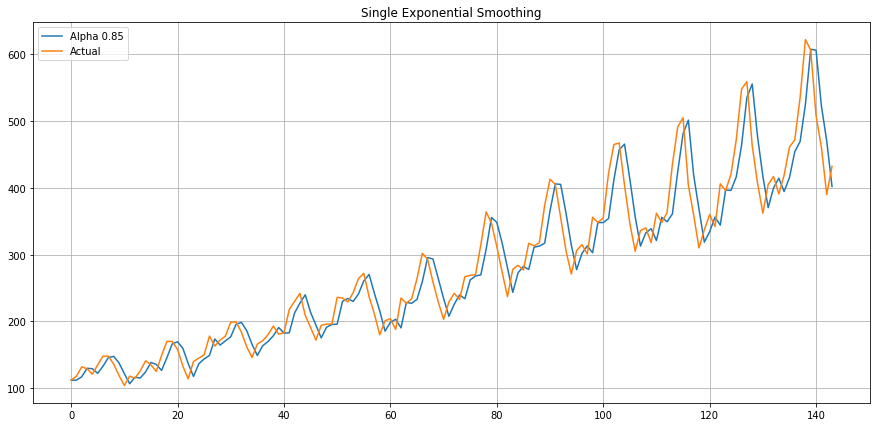

In [205]:
# plotting for least MSE for 1 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.85],1)

In [206]:
#prediction of alpha beta gamma for minimum MSE for 2 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 2 months is " , MSE_SES(data, .85, interval=2), "\n")
print("MSE for alpha =.7 with interval = 2 months is " , MSE_SES(data, .7, interval=2), "\n")
print("MSE for alpha =.9 with interval = 2 months is " , MSE_SES(data, .9, interval=2), "\n")

MSE for alpha =.85 with interval = 2 hours is  1615.4763977440182 

MSE for alpha =.7 with interval = 2 hours is  1819.399776923076 

MSE for alpha =.9 with interval = 2 hours is  1549.2840615691825 



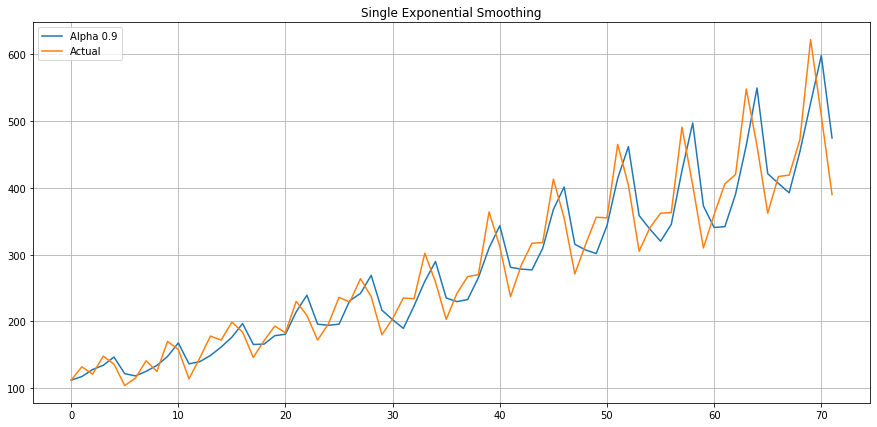

In [207]:
# plotting for least MSE for 2 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.9],2)

In [208]:
#prediction of alpha beta gamma for minimum MSE for 4 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 4 months is " , MSE_SES(data, .85, interval=4), "\n")
print("MSE for alpha =.7 with interval = 4 months  is " , MSE_SES(data, .7, interval=4), "\n")
print("MSE for alpha =.75 with interval = 4 months is " , MSE_SES(data, .75, interval=4), "\n")

MSE for alpha =.85 with interval = 4 hours is  692.1315755168241 

MSE for alpha =.7 with interval = 4 hours  is  378.89160797439393 

MSE for alpha =.75 with interval = 4 hours is  464.74061648188155 



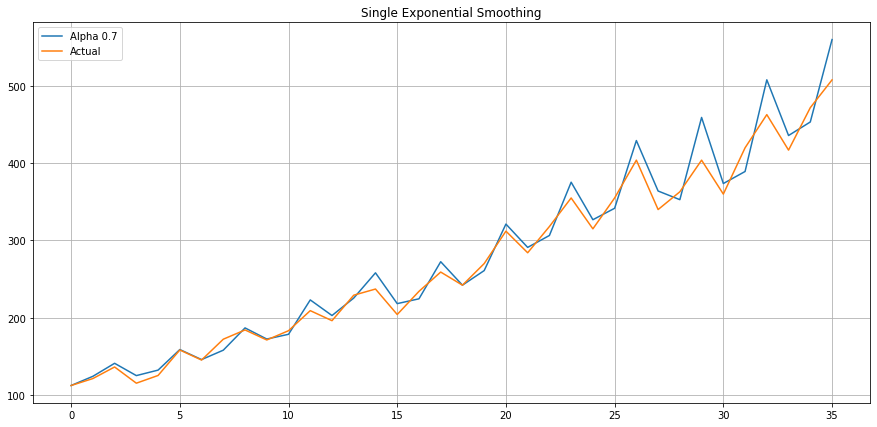

In [209]:
# plotting for least MSE for 4 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.7],4)

In [210]:
#prediction of alpha beta gamma for minimum MSE for 8 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 8months is " , MSE_SES(data, .85, interval=8), "\n")
print("MSE for alpha =.7 with interval = 8 months is " , MSE_SES(data, .7, interval=8), "\n")
print("MSE for alpha =.9 with interval = 8 months is " , MSE_SES(data, .9, interval=8), "\n")

MSE for alpha =.85 with interval = 8hours is  400.4447350138759 

MSE for alpha =.7 with interval = 8 hours is  112.47009675066747 

MSE for alpha =.9 with interval = 8 hours is  554.9191808945609 



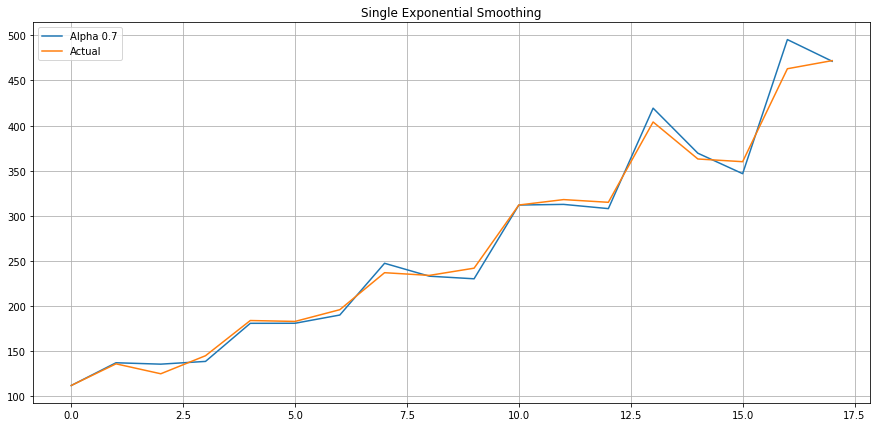

In [211]:
# plotting for least MSE for 8 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.7],8)

In [212]:
#prediction of alpha beta gamma for minimum MSE for 12 month inervals for single exponential smoothing

print("MSE for alpha =..85 with interval = 12 months is " , MSE_SES(data, .85, interval=12), "\n")
print("MSE for alpha =.9 with interval = 12 months   is " , MSE_SES(data, .9, interval=12), "\n")
print("MSE for alpha =.95 with interval = 12 months  is " , MSE_SES(data, .95, interval=12), "\n")

MSE for alpha =..85 with interval = 12 hours is  175.21056320743324 

MSE for alpha =.9 with interval = 12 hours   is  137.44723883260497 

MSE for alpha =.95 with interval = 12 hours  is  108.63299516167324 



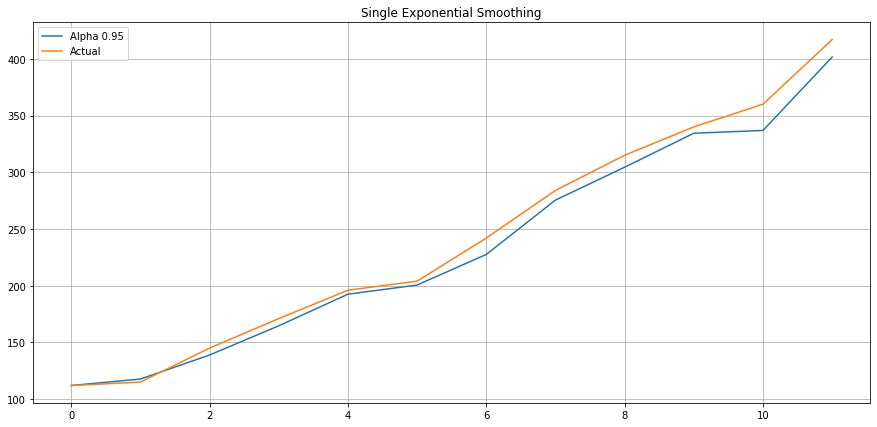

In [213]:
# plotting for least MSE for 12 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],12)

In [214]:
#prediction of alpha beta gamma for minimum MSE for 24 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 24 months is " , MSE_SES(data, .85, interval=24), "\n")
print("MSE for alpha =.9 with interval = 24 months is " , MSE_SES(data, .9, interval=24), "\n")
print("MSE for alpha =.95 with interval = 24 months is " , MSE_SES(data, .95, interval=24), "\n")

MSE for alpha =.85 with interval = 24 hours is  319.6805012897502 

MSE for alpha =.9 with interval = 24 hours is  237.99438805040003 

MSE for alpha =.95 with interval = 24 hours is  177.5605717378463 



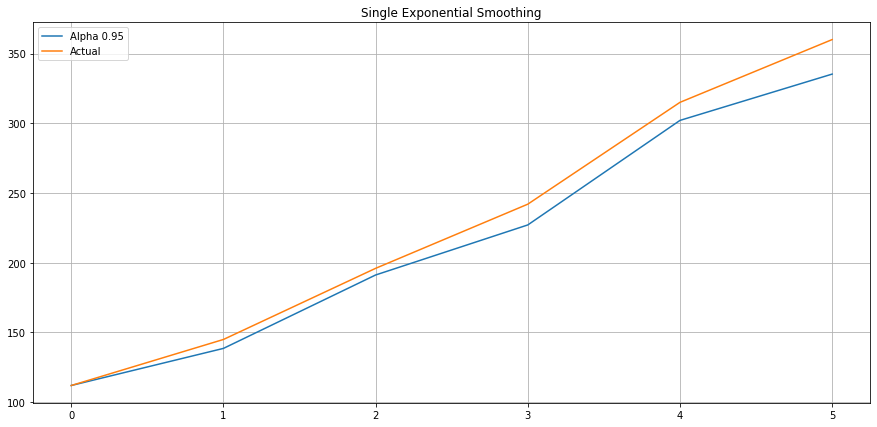

In [215]:
# plotting for least MSE for 24 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],24)

In [216]:
#prediction of alpha beta gamma for minimum MSE for 48 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 48 months is " , MSE_SES(data, .85, interval=48), "\n")
print("MSE for alpha =.8 with interval = 48 months is " , MSE_SES(data, .8, interval=48), "\n")
print("MSE for alpha =.95 with interval = 48 months is " , MSE_SES(data, .95, interval=48), "\n")

MSE for alpha =.85 with interval = 48 hours is  322.9120083333339 

MSE for alpha =.8 with interval = 48 hours is  513.7541333333332 

MSE for alpha =.95 with interval = 48 hours is  85.46600833333349 



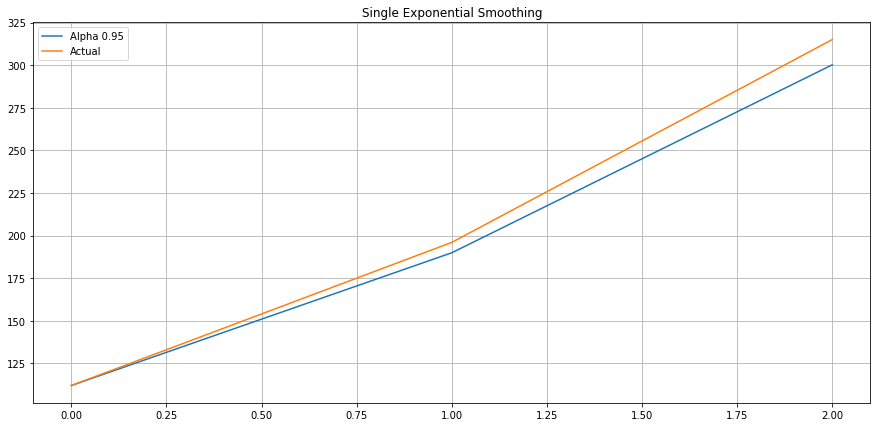

In [217]:
# plotting for least MSE for 48 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],48)

In [218]:
#tabulate minimum MSE for different intervals for single exponential smoothing

from tabulate import tabulate
print(tabulate([['1 month', 1252], ['2 month', 1549],['4 month', 378],['8 month', 112],['12 month', 108],['24 month', 177],['48 month', 88]], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   |   minimum MSE |
|-------------+---------------|
| 1 hour      |          1252 |
| 2 hour      |          1549 |
| 4 hour      |           378 |
| 8 hour      |           112 |
| 12 hour     |           108 |
| 24 hour     |           177 |
| 48 hour     |            88 |


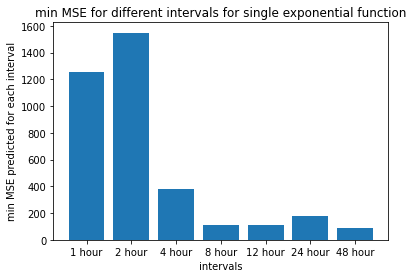

In [219]:
# Bar chart comparison for min MSE of different intervals for single exponential function

import matplotlib.pyplot as plt
plt.bar(['1 month','2 month','4 month','8 month','12 month','24 month','48 month'], [1252, 1549, 378, 112,108,177,85])
plt.title('min MSE for different intervals for single exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Double exponential smoothing with different intervals

In [220]:
#prediction of alpha beta gamma for minimum MSE for 1 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .6 with interval = 1 month  is  " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.75, beta = .5 with interval = 1 month  is  " ,MSE_DES(data, .75, .5 ,interval=1), "\n")
print("MSE for alpha =.8, beta = .4 with interval = 1 month   is  " ,MSE_DES(data, .8, .4 ,interval=1), "\n")

MSE for alpha =.85, beta = .6 with interval = 1 hour  is   1572.578312914413 

MSE for alpha =.75, beta = .5 with interval = 1 hour  is   1738.2307943237984 

MSE for alpha =.8, beta = .4 with interval = 1 hour   is   1628.210269946042 



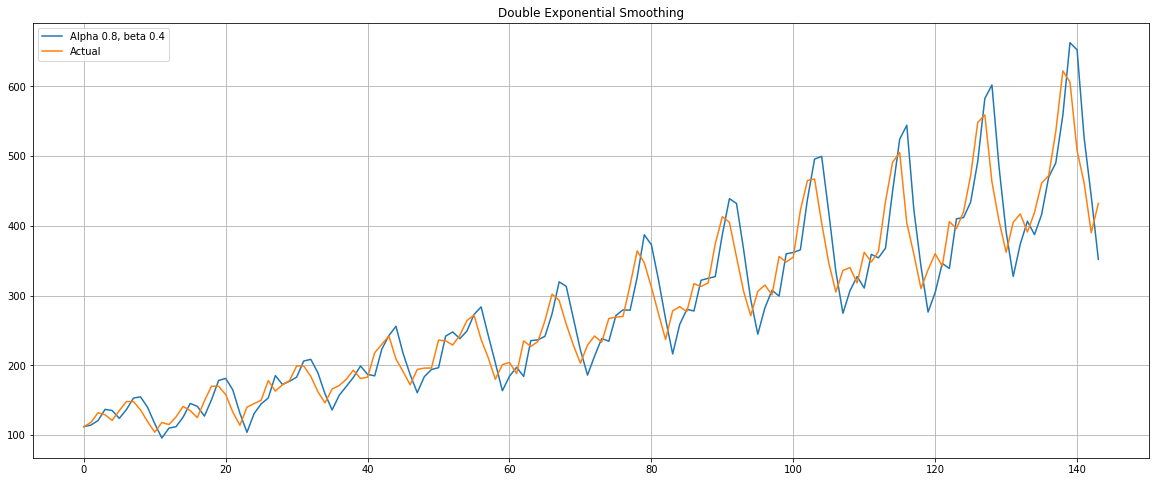

In [221]:
# plotting for least MSE for 1 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.8], [0.4], 1)

In [222]:
#prediction of alpha beta gamma for minimum MSE for 2 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 1 month is  " ,MSE_DES(data, .85, .5 ,interval=2), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 1 month  is  " ,MSE_DES(data, .9, .6 ,interval=2), "\n")
print("MSE for alpha =.7, beta = .4 with interval = 1 month  is  " ,MSE_DES(data, .7, .4 ,interval=2), "\n")


MSE for alpha =.85, beta = .5 with interval = 1 hour is   4798.401404112136 

MSE for alpha =.9, beta = .6 with interval = 1 hour  is   5127.685319866385 

MSE for alpha =.7, beta = .4 with interval = 1 hour  is   4391.450361711096 



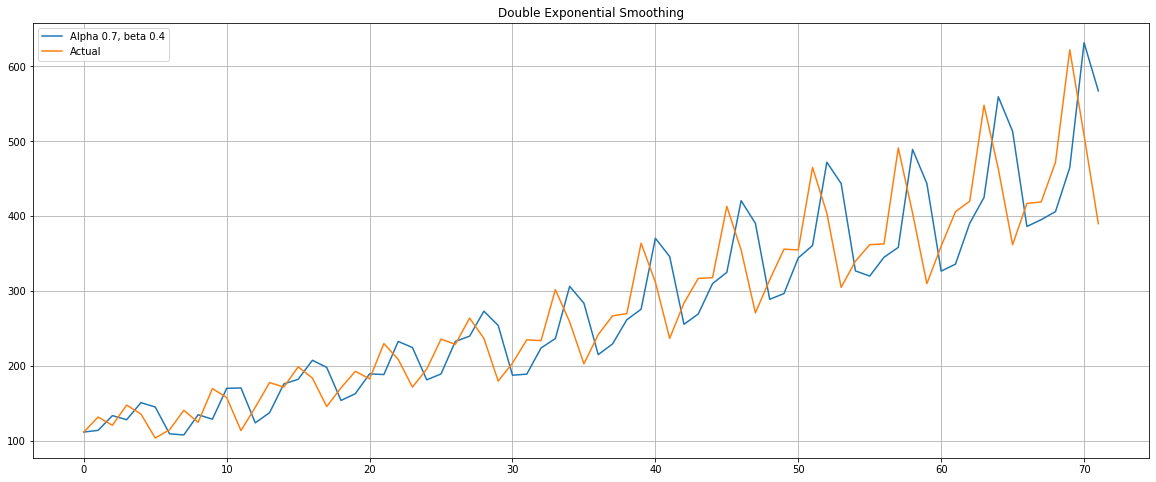

In [223]:
# plotting for least MSE for 2 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.7], [0.4], 2)

In [224]:
#prediction of alpha beta gamma for minimum MSE for 4 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .6 with interval = 1 month  is  " ,MSE_DES(data, .85, .6 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .65 with interval = 1 month  is  " ,MSE_DES(data, .8, .65 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .55 with interval = 1 month  is  " ,MSE_DES(data, .8, .55 ,interval=2), "\n")

MSE for alpha =.85, beta = .6 with interval = 1 hour  is   5096.949857663668 

MSE for alpha =.8, beta = .65 with interval = 1 hour  is   5234.678048128466 

MSE for alpha =.8, beta = .55 with interval = 1 hour  is   4942.82978244293 



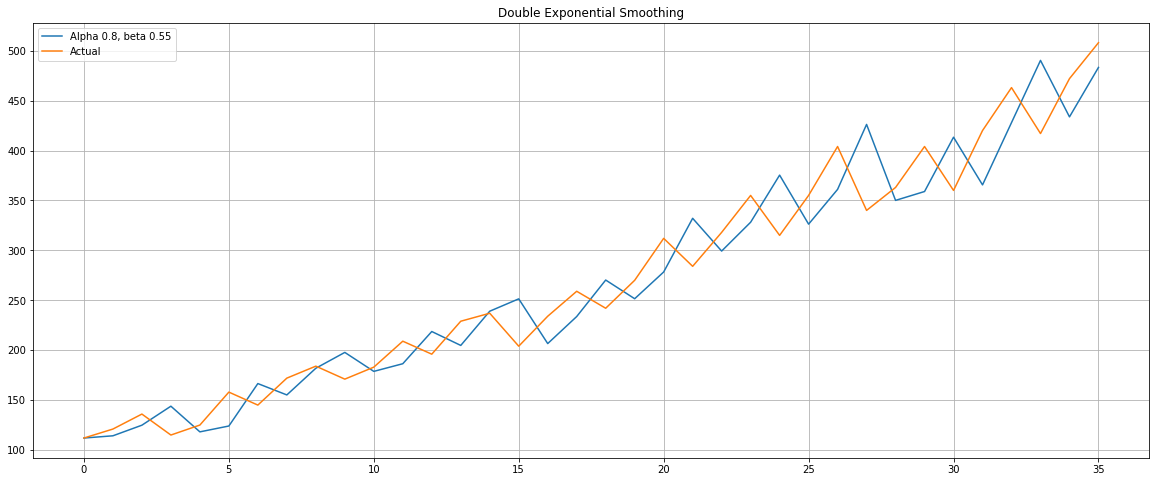

In [225]:
# plotting for least MSE for 4 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.8], [0.55], 4)

In [226]:
#prediction of alpha beta gamma for minimum MSE for 8 month inervals for Double exponential smoothing

print("MSE for alpha =.75, beta = .5 with interval = 1 month   is  " ,MSE_DES(data, .75, .5 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .4 with interval = 1 month    is  " ,MSE_DES(data, .8, .4 ,interval=2), "\n")
print("MSE for alpha =.85, beta = .55 with interval = 1 month  is  " ,MSE_DES(data, .85, .55 ,interval=2), "\n")

MSE for alpha =.75, beta = .5 with interval = 1 hour   is   4776.213569498325 

MSE for alpha =.8, beta = .4 with interval = 1 hour    is   4453.47589989747 

MSE for alpha =.85, beta = .55 with interval = 1 hour  is   4950.82430568183 



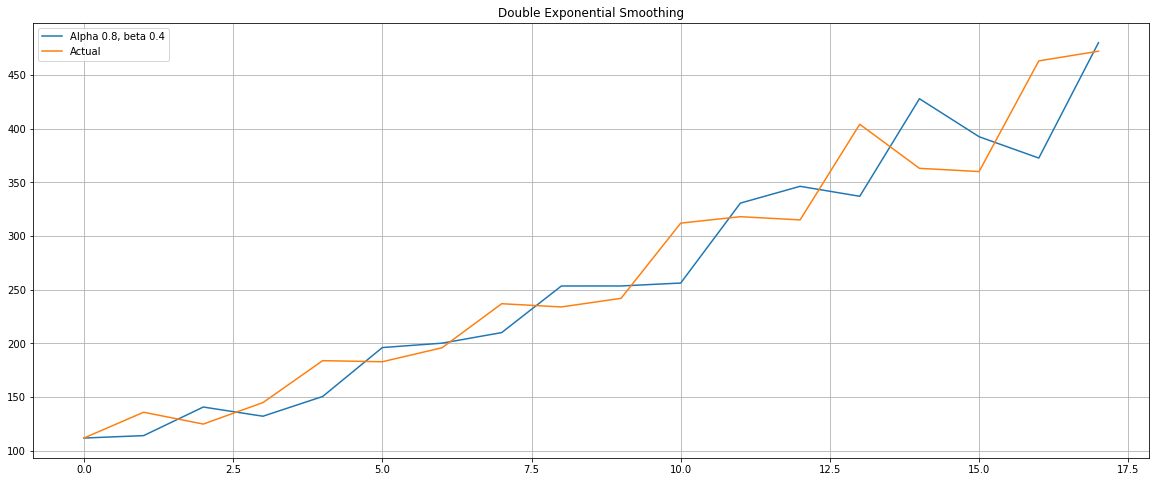

In [227]:
# plotting for least MSE for 8 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.8], [0.4], 8)

In [228]:
#prediction of alpha beta gamma for minimum MSE for 12 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 12 month is  " ,MSE_DES(data, .5, .5 ,interval=12), "\n")
print("MSE for alpha =.9, beta = .4 with interval = 12 month  is  " ,MSE_DES(data, .4, .4 ,interval=12), "\n")
print("MSE for alpha =.9, beta = .5 with interval = 12 month  is  " ,MSE_DES(data, .3, .5 ,interval=12), "\n")

MSE for alpha =.85, beta = .5 with interval = 12 hour is   315.7557383877743 

MSE for alpha =.9, beta = .4 with interval = 12 hour  is   502.1589644098937 

MSE for alpha =.9, beta = .5 with interval = 12 hour  is   627.2080056592355 



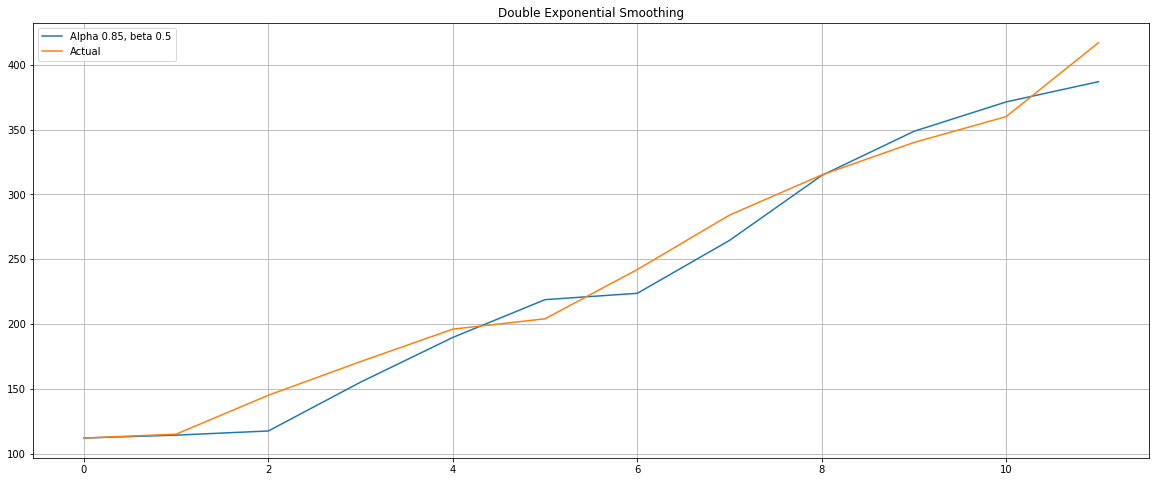

In [229]:
# plotting for least MSE for 12 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.5], 12)

In [230]:
#prediction of alpha beta gamma for minimum MSE for 24 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 24 month  is  " ,MSE_DES(data, .85, .5 ,interval=24), "\n")
print("MSE for alpha =.9, beta = .55 with interval = 24 month  is  " ,MSE_DES(data, .9, .55 ,interval=24), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 24 month   is  " ,MSE_DES(data, .9, .6 ,interval=24), "\n")

MSE for alpha =.85, beta = .5 with interval = 24 hour  is   703.5695988812969 

MSE for alpha =.9, beta = .55 with interval = 24 hour  is   600.3554576435523 

MSE for alpha =.9, beta = .6 with interval = 24 hour   is   562.6608124606582 



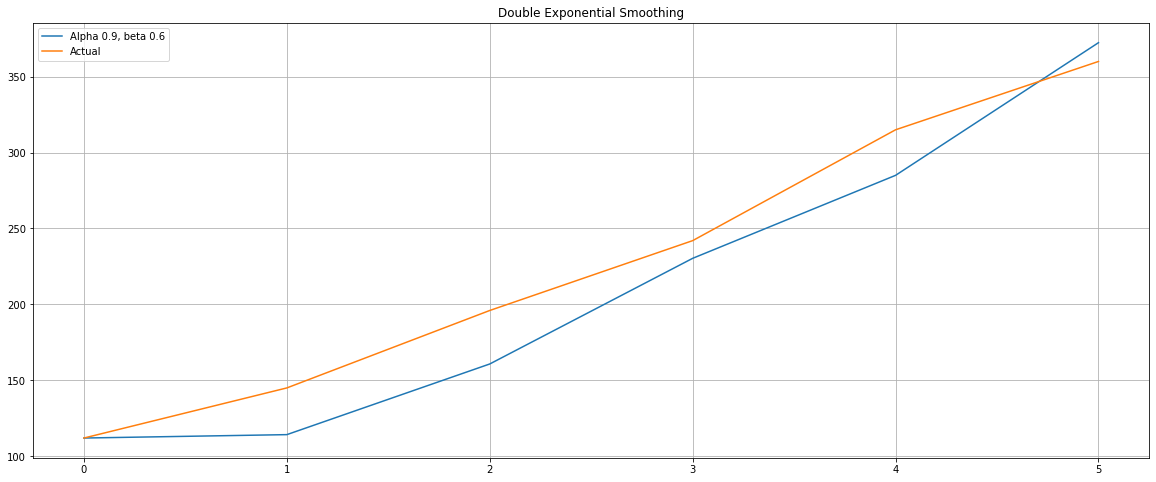

In [231]:
# plotting for least MSE for 24 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.9], [0.6], 24)

In [232]:
#prediction of alpha beta gamma for minimum MSE for 48 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 48 month  is  " ,MSE_DES(data, .85, .5 ,interval=48), "\n")
print("MSE for alpha =.9, beta = .55 with interval = 48 month  is  " ,MSE_DES(data, .9, .55 ,interval=48), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 48 month   is  " ,MSE_DES(data, .9, .6 ,interval=48), "\n")

MSE for alpha =.85, beta = .5 with interval = 48 hour  is   5191.111201688754 

MSE for alpha =.9, beta = .55 with interval = 48 hour  is   4606.531556483608 

MSE for alpha =.9, beta = .6 with interval = 48 hour   is   4403.859721753303 



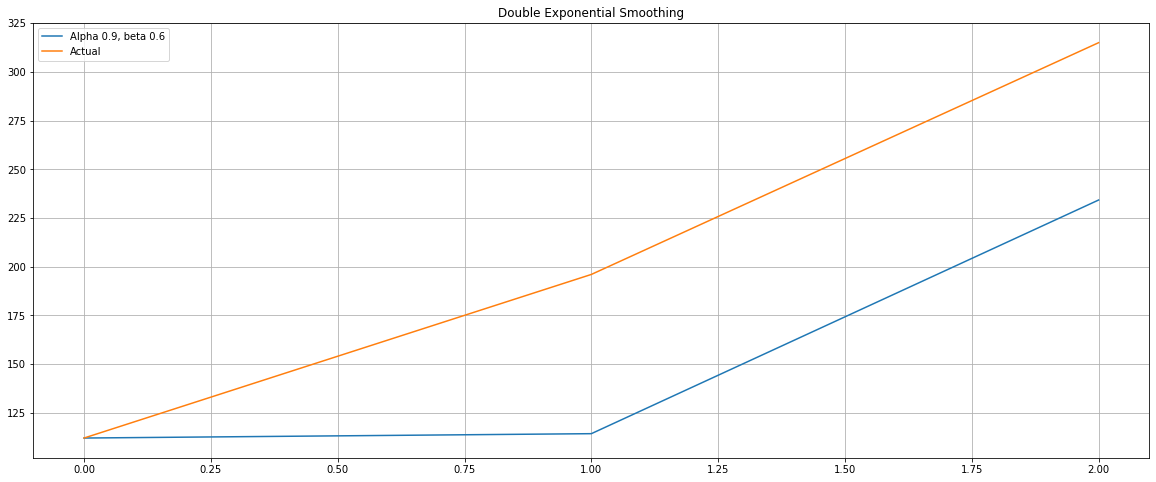

In [233]:
# plotting for least MSE for 48 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.9], [0.6], 48)

In [234]:
#tabulate minimum MSE for different intervals for double exponential smoothing

from tabulate import tabulate
print(tabulate([['1 month', 1628], ['2 month', 4391],['4 month', 4942],['8 month', 4453],['12 month', 315],['24 month', 562],['48 month', 4403]], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   |   minimum MSE |
|-------------+---------------|
| 1 hour      |          1628 |
| 2 hour      |          4391 |
| 4 hour      |          4942 |
| 8 hour      |          4453 |
| 12 hour     |           315 |
| 24 hour     |           562 |
| 48 hour     |          4403 |


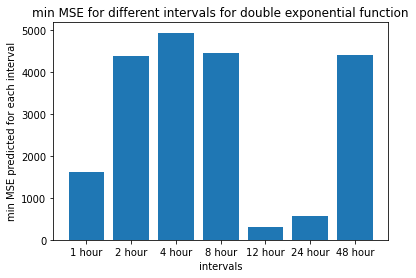

In [235]:
# Bar chart comparison for min MSE of different intervals for double exponential function

import matplotlib.pyplot as plt
plt.bar(['1 month','2 month','4 month','8 month','12 month','24 month','48 month'], [1628, 4391,4942,4453,315,562,4403])
plt.title('min MSE for different intervals for double exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Triple exponential smoothing with different intervals

In [236]:
#prediction of alpha beta gamma for minimum MSE for 1 month inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .1 with interval = 1 month is " ,MSE_TES(data,12, .9, .2 , .1,interval=1), "\n")
print("MSE for alpha =.9, beta = .2, gamma = .2 with interval = 1 month is " ,MSE_TES(data,12, .9, .2 , .2,interval=1), "\n")
print("MSE for alpha =.85, beta = .2, gamma = .2 with interval = 1 monthis " ,MSE_TES(data,12, .85, .2 , .2,interval=1), "\n")

MSE for alpha =.9, beta = .2, gamma = .1 with interval = 1 hour is  26.10504012903006 

MSE for alpha =.9, beta = .2, gamma = .2 with interval = 1 hour is  26.498419280245216 

MSE for alpha =.85, beta = .2, gamma = .2 with interval = 1 houris  27.220621804142745 



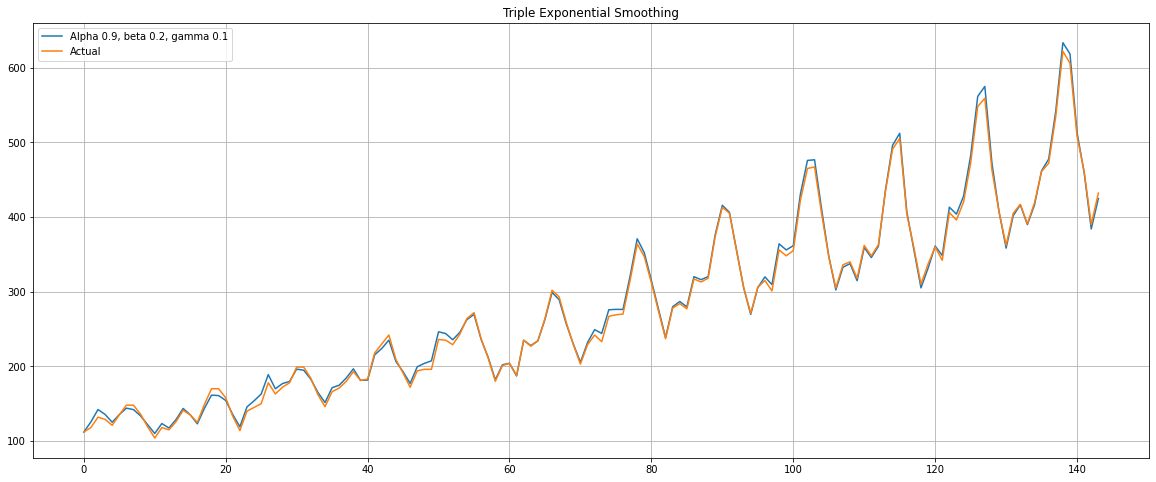

In [237]:
# plotting for least MSE for 1 month according to bar chart for triple exponential function

plot_triple_exponential_smoothing(data.values, 12,[0.9], [0.2], [.1], 1)

In [238]:
#prediction of alpha beta gamma for minimum MSE for 2 month inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .1 with interval = 2 month   is " ,MSE_TES(data,12, .9, .2 , .1,interval=2), "\n")
print("MSE for alpha =.9, beta = .2, gamma = .15 with interval = 2 month  is " ,MSE_TES(data,12, .9, .2 , .15,interval=2), "\n")
print("MSE for alpha =.85, beta = .2, gamma = .15 with interval = 2 month is " ,MSE_TES(data,12, .85, .2 , .15,interval=2), "\n")

MSE for alpha =.9, beta = .2, gamma = .1 with interval = 2 hour   is  47.582400083265206 

MSE for alpha =.9, beta = .2, gamma = .15 with interval = 2 hour  is  47.73743850066794 

MSE for alpha =.85, beta = .2, gamma = .15 with interval = 2 hour is  48.99136982135523 



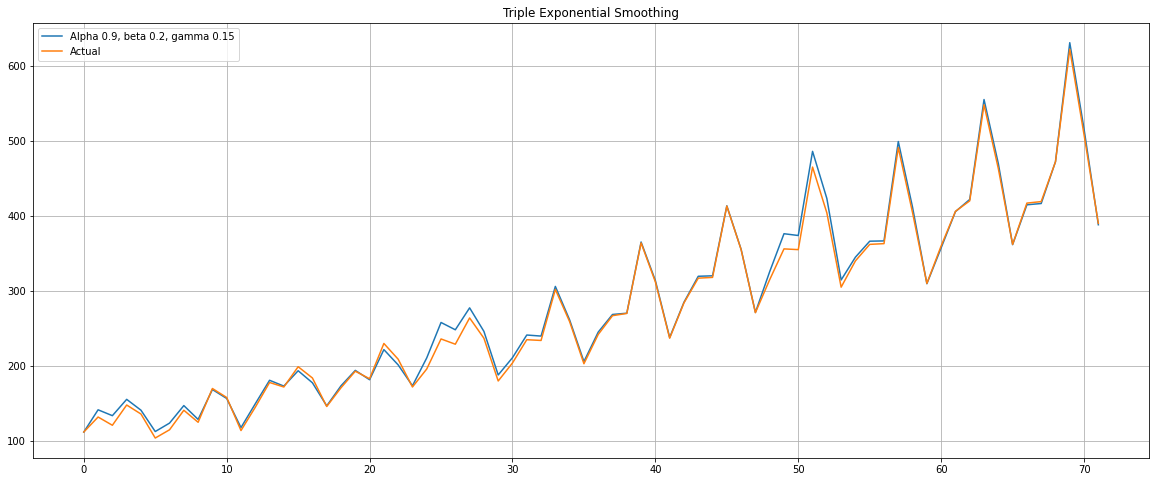

In [239]:
# plotting for least MSE for 2 month according to bar chart for triple exponential function

plot_triple_exponential_smoothing(data.values, 12,[0.9], [0.2], [.15], 2)

In [240]:
#prediction of alpha beta gamma for minimum MSE for 4 month inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .3 with interval = 4 month    is " ,MSE_TES(data,12, .9, .2 , .3,interval=4), "\n")
print("MSE for alpha =.85, beta = .25, gamma = .15 with interval = 4 month is " ,MSE_TES(data,12, .85, .25 , .15,interval=4), "\n")
print("MSE for alpha =.8, beta = .2, gamma = .2 with interval = 4 month    is " ,MSE_TES(data,12, .8, .2 , .2,interval=4), "\n")

MSE for alpha =.9, beta = .2, gamma = .3 with interval = 4 hour    is  120.76390720879203 

MSE for alpha =.85, beta = .25, gamma = .15 with interval = 4 hour is  138.98713081571609 

MSE for alpha =.8, beta = .2, gamma = .2 with interval = 4 hour    is  127.38505871402643 



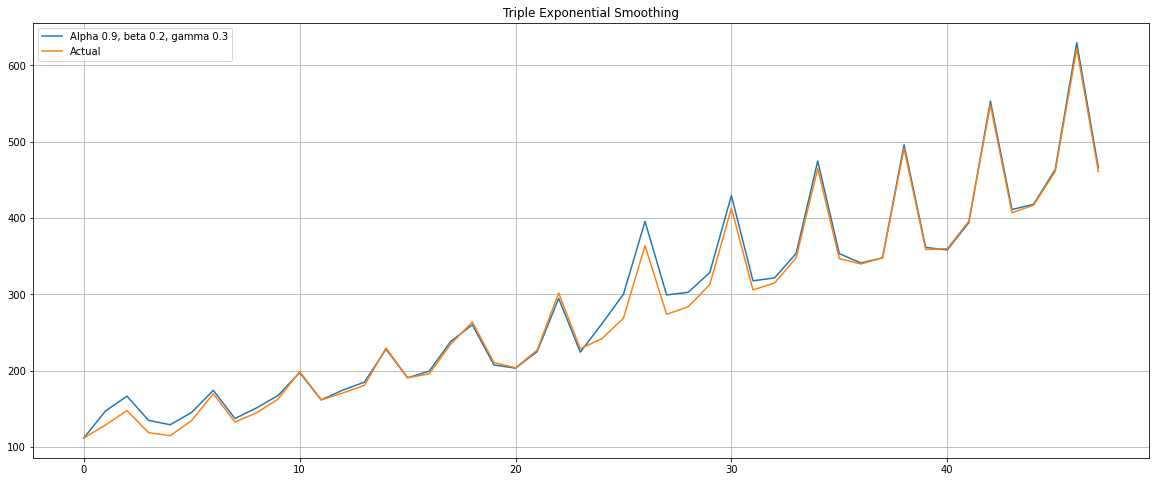

In [241]:
# plotting for least MSE for 4 month according to bar chart for triple exponential function

plot_triple_exponential_smoothing(data.values, 12,[0.9], [0.2], [.3], 3)

In [242]:
#prediction of alpha beta gamma for minimum MSE for different inervals for triple exponential smoothing

print("MSE for interval = 8 month is " ,"unable to find as no of month in seassion is 8", "\n")
print("MSE for interval = 12 month is " ,"unable to find as no of month in seassion is 12", "\n")
print("MSE for interval = 24 month is " ,"unable to find as no of month in seassion is 24", "\n")
print("MSE for interval = 48 month is " ,"unable to find as no of month in seassion is 48", "\n")

MSE for interval = 8 hour is  unable to find as no of hour in seassion is 8 

MSE for interval = 12 hour is  unable to find as no of hour in seassion is 12 

MSE for interval = 24 hour is  unable to find as no of hour in seassion is 24 

MSE for interval = 48 hour is  unable to find as no of hour in seassion is 48 



In [243]:
#tabulate minimum MSE for different intervals for triple exponential smoothing

from tabulate import tabulate
print(tabulate([['1 month', 26], ['2 month', 47],['4 month', 120],['8 month', 'unable to find as no of month in seassion is 24'],['12 month', 'unable to find as no of month in seassion is 24'],['24 month', "unable to find as no of month in seassion is 24"],['48 month', 'unable to find as no of month in seassion is 24']], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   | minimum MSE                                    |
|-------------+------------------------------------------------|
| 1 hour      | 26                                             |
| 2 hour      | 47                                             |
| 4 hour      | 120                                            |
| 8 hour      | unable to find as no of hour in seassion is 24 |
| 12 hour     | unable to find as no of hour in seassion is 24 |
| 24 hour     | unable to find as no of hour in seassion is 24 |
| 48 hour     | unable to find as no of hour in seassion is 24 |


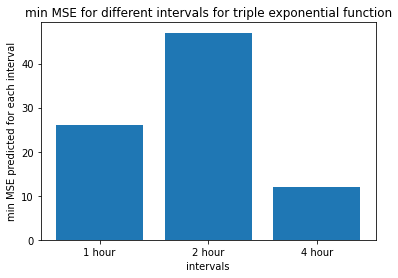

In [244]:
# Bar chart comparison for min MSE of different intervals for triple exponential function

import matplotlib.pyplot as plt
plt.bar(['1 month','2 month','4 month'], [26,47,12])
plt.title('min MSE for different intervals for triple exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Comparison of inbuild function and self made function for single exponential smoothing 

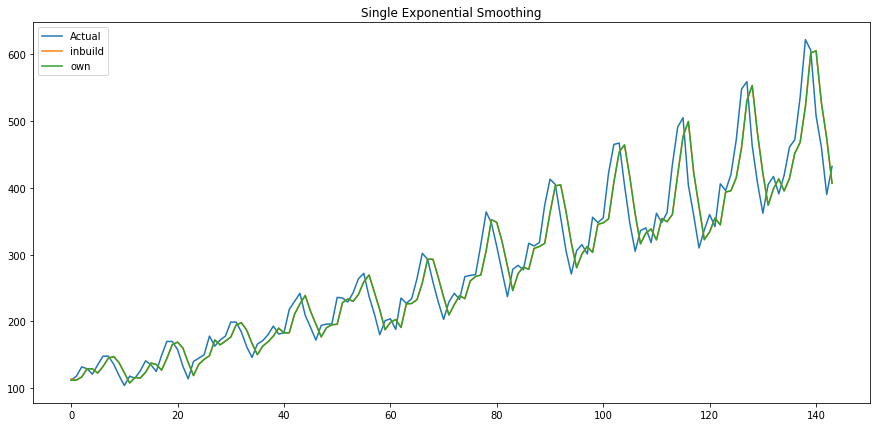

In [245]:
# comparison between inbuild and my own function graph for single exponential smoothing

p= D3
p['inbuild SES']=SimpleExpSmoothing(p['Passengers']).fit(smoothing_level= .8 ,optimized=True).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Single Exponential Smoothing')
plt.plot(p['Passengers'], label='Actual')
plt.plot(p['inbuild SES'], label='inbuild')
plt.plot(single_exponential_smoothing(data, .8,1), label='own')
plt.legend()

In [246]:
#MSE comparision between inbuild function and own function for single exponential smoothing

inbuildMSE_SES = np.square(np.subtract(p['Passengers'],p['inbuild SES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_SES, "\n")
print("MSE by my own function is " ,MSE_SES(data, .85,1), "\n")

MSE by inbuild function is  1304.139291796492 

MSE by my own function is  1252.8350816023635 



#Comparison of inbuild function and self made function for Double exponential smoothing 

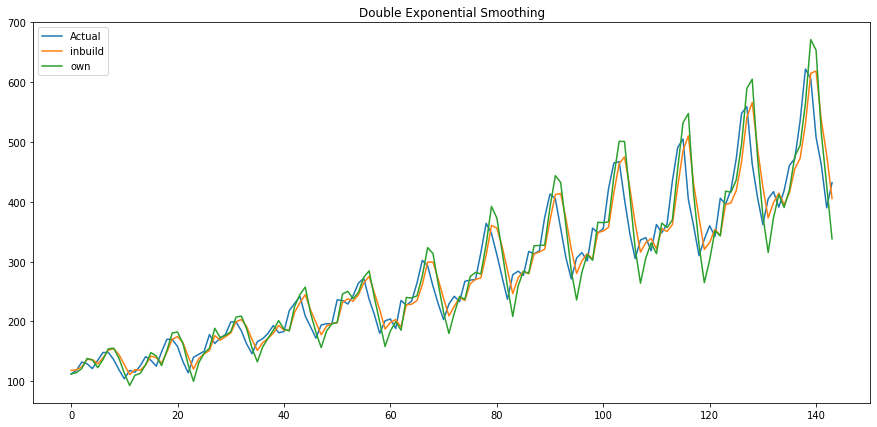

In [247]:
# comparison between inbuild and my own function graph for double exponential smoothing

q= D3
q['inbuild DES']=Holt(q['Passengers']).fit(smoothing_level= .8 , smoothing_slope=.06, optimized=False).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Double Exponential Smoothing')
plt.plot(q['Passengers'], label='Actual')
plt.plot(q['inbuild DES'], label='inbuild')
plt.plot(double_exponential_smoothing(data, .8,.5, 1), label='own')
plt.legend()


In [248]:
#MSE comparision between inbuild function and own function for double exponential smoothing

inbuildMSE_DES = np.square(np.subtract(q['Passengers'],q['inbuild DES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_DES, "\n")
print("MSE by my own function is " ,MSE_DES(data, .85, .5,1), "\n")

MSE by inbuild function is  1383.6514607122504 

MSE by my own function is  1561.7882800089944 



# Comparison of inbuild function and self made function for Triple exponential smoothing 

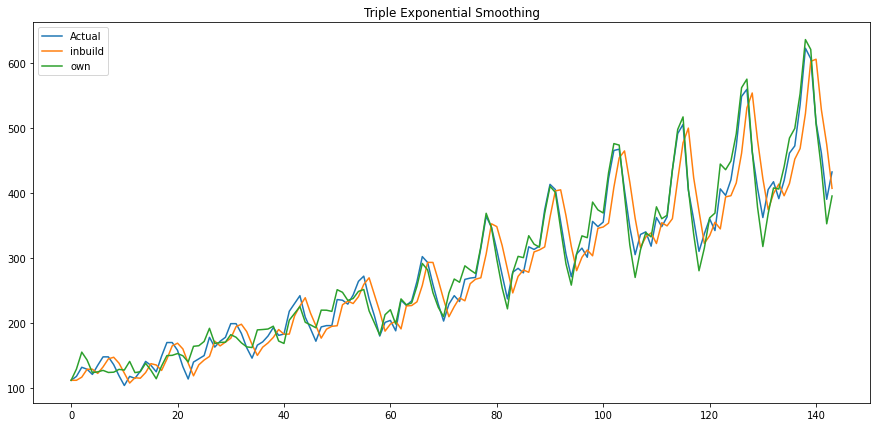

In [249]:
# comparison between inbuild and my own function graph for triple exponential smoothing

r= D3
r['inbuild TES']=ExponentialSmoothing(r['Passengers']).fit(smoothing_level= .8 , smoothing_slope=.06, smoothing_seasonal=0.95, optimized=False).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Triple Exponential Smoothing')
plt.plot(r['Passengers'], label='Actual')
plt.plot(r['inbuild TES'], label='inbuild')
plt.plot(triple_exponential_smoothing(data,24,.5, .8,.5, 1), label='own')
plt.legend()

In [250]:
#MSE comparision between inbuild function and own function for triple exponential smoothing

inbuildMSE_TES = np.square(np.subtract(r['Passengers'],r['inbuild TES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_TES, "\n")
print("MSE by my own function is " ,MSE_TES(data, 24,.5,.7, .85,1), "\n")

MSE by inbuild function is  1304.1609035809436 

MSE by my own function is  569.9994641996598 



#24 month futuristic forecast for D3

In [251]:
#Defining triple exponential smoothing function for predicting future value

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval, n_pred):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)+ n_pred):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

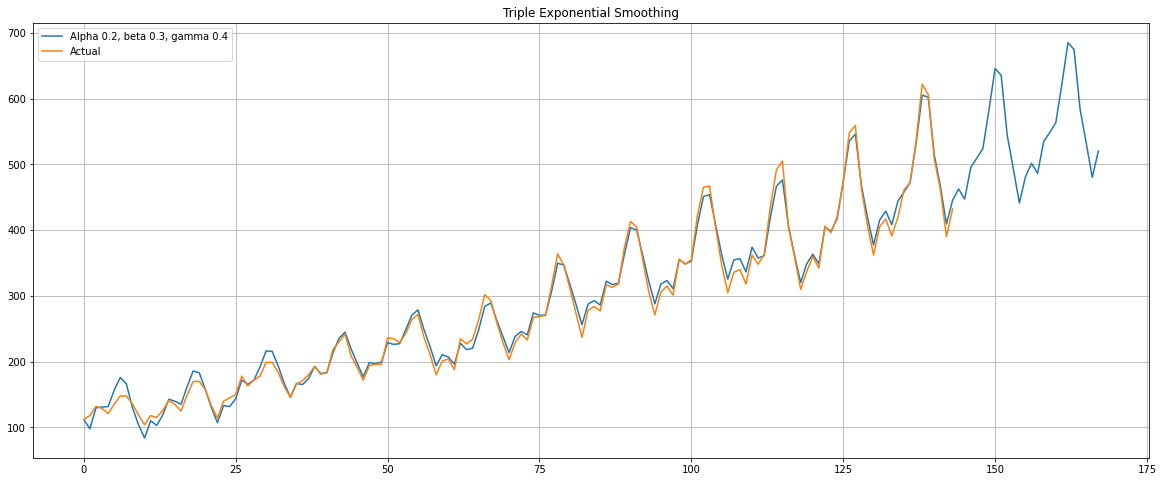

In [252]:
#Defining plot with futuristic predictions

def plot_triple_exponential_smoothing(data, slen, alphas, betas,gammas, interval, n_pred):
  plt.figure(figsize=(20, 8))
  for alpha, beta , gamma in zip(alphas, betas, gammas):
    results = triple_exponential_smoothing(data, 12, alpha, beta, gamma,interval, n_pred)
    plt.plot(results, label='Alpha {}, beta {}, gamma {}'.format(alpha, beta, gamma))
  plt.plot(data_n(data,interval), label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Triple Exponential Smoothing')
  plt.grid(True)

plot_triple_exponential_smoothing(data.values, 12,[0.2], [0.3], [.4], 1, 24)

#Date Time format for D3

In [253]:

df = pd.read_csv('D3.csv')
con=df['Month']
df['Month']=pd.to_datetime(df['Month'])

df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


#Calculation of seasonal index

In [254]:
#defining seasonal index function

def seasonal_index(data,season_len):
  seasonality_index = {}
  season_sum = []
  n_season = (len(data)//season_len)
  for j in range(n_season):
    season_sum.append(sum(data[season_len*j:season_len*j+season_len]))
  for i in range(season_len):
    sum_over_avg = 0.0
    for j in range(n_season):
      sum_over_avg += (data[season_len*j+i])/season_sum[j]
    seasonality_index[i] = sum_over_avg/n_season
  return seasonality_index


In [255]:
#calculating seasonal index

seasonal_index(df.iloc[:,1],season_len=12)

{0: 0.07176116094655523,
 1: 0.07098923031905428,
 2: 0.0816665037416323,
 3: 0.07991386093095403,
 4: 0.08051922848687808,
 5: 0.09188501337994531,
 6: 0.1030300255071956,
 7: 0.1030912872888175,
 8: 0.09006508649349365,
 9: 0.07922942021208379,
 10: 0.069332075926494,
 11: 0.07851710676689629}